<a href="https://colab.research.google.com/github/mandar-solanki/Regression-Methods-exercises/blob/main/Exercise_D2A_1218_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Current working directoty
import os
print(os.getcwd())

/content


In [2]:
!unzip /content/flights.zip

Archive:  /content/flights.zip
  inflating: flights.csv             


In [4]:
import pandas as pd

# load the training dataset
bike_data = pd.read_csv('/content/flights.csv')
bike_data.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [9]:
bike_data.dtypes


,0
Year,int64
Month,int64
DayofMonth,int64
DayOfWeek,int64
Carrier,object
OriginAirportID,int64
OriginAirportName,object
OriginCity,object
OriginState,object
DestAirportID,int64


In [14]:
numeric_features = ['CRSDepTime', 'CRSArrTime', 'ArrDelay', 'DepDelay']
bike_data[numeric_features].describe()


,CRSDepTime,CRSArrTime,ArrDelay,DepDelay
count,271940.000000,271940.000000,271940.000000,271940.000000
mean,1325.498713,1505.477819,6.496650,10.350449
std,470.748546,493.204020,38.230331,35.673710
min,1.000000,1.000000,-75.000000,-63.000000
25%,920.000000,1119.000000,-11.000000,-4.000000
50%,1320.000000,1529.000000,-3.000000,-1.000000
75%,1725.000000,1918.000000,10.000000,9.000000
max,2359.000000,2359.000000,1440.000000,1425.000000


### Histograms
DepDelay
ArrDelay
CRSDepTime
CRSArrTime



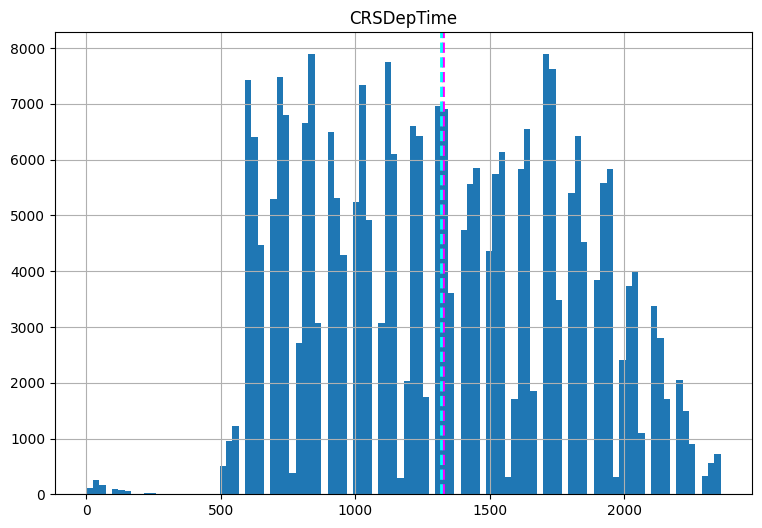

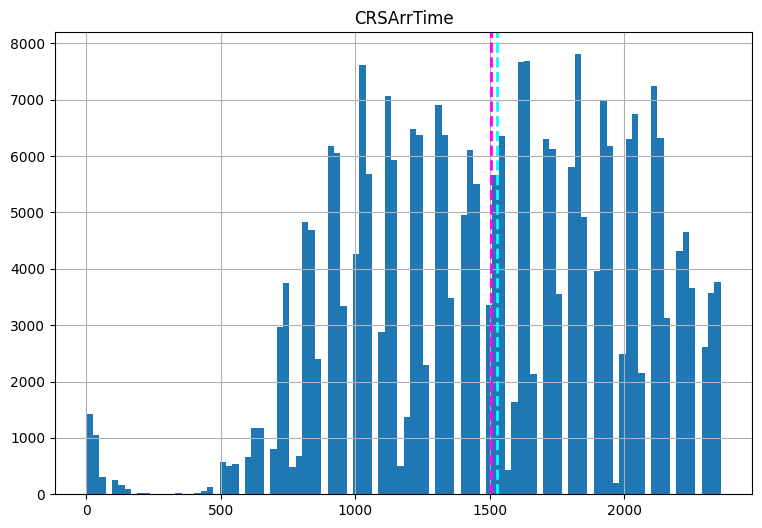

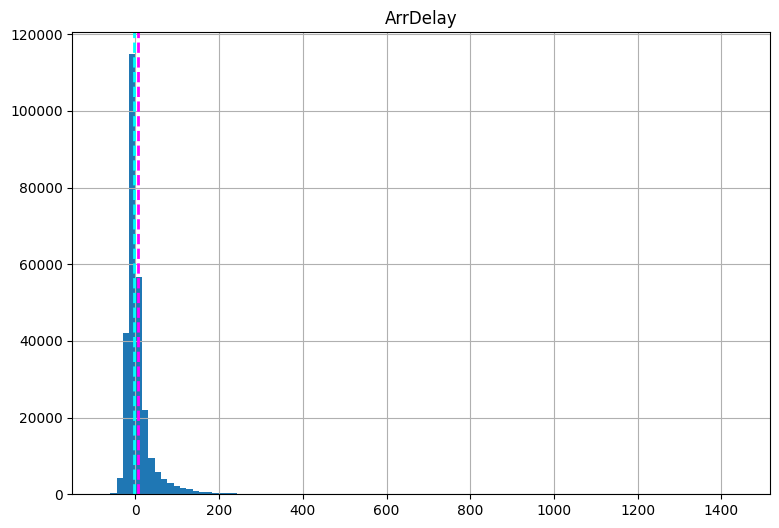

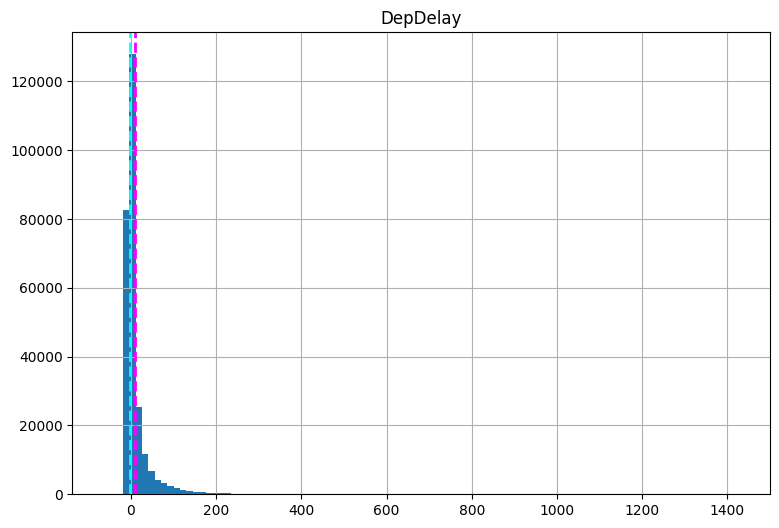

In [15]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

### Box Plots

DepDelay by Carrier, DayOfWeek

ArrDelay by OriginState, DestState


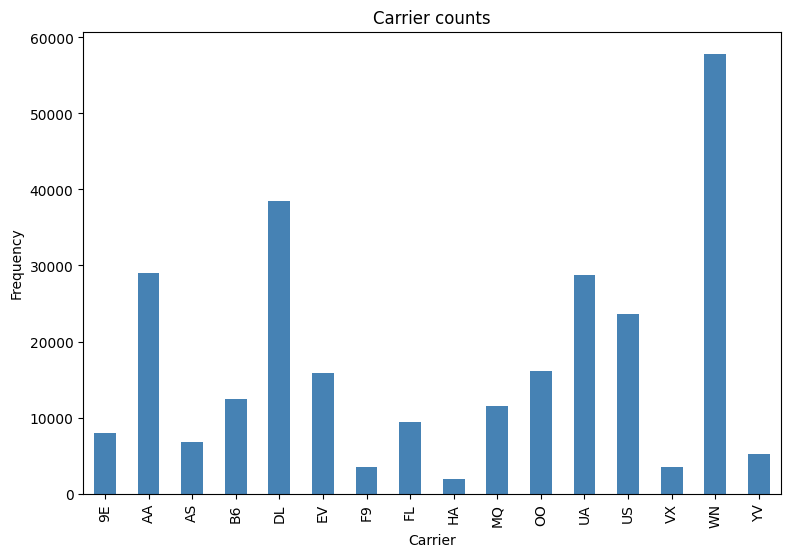

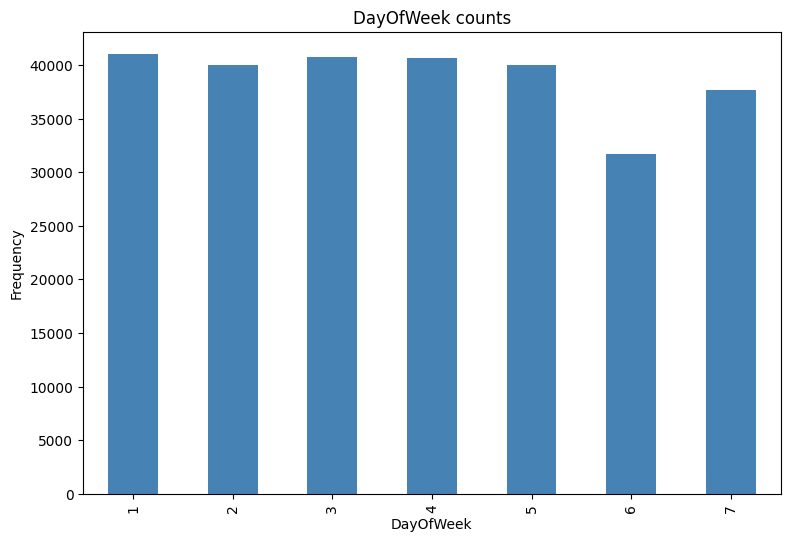

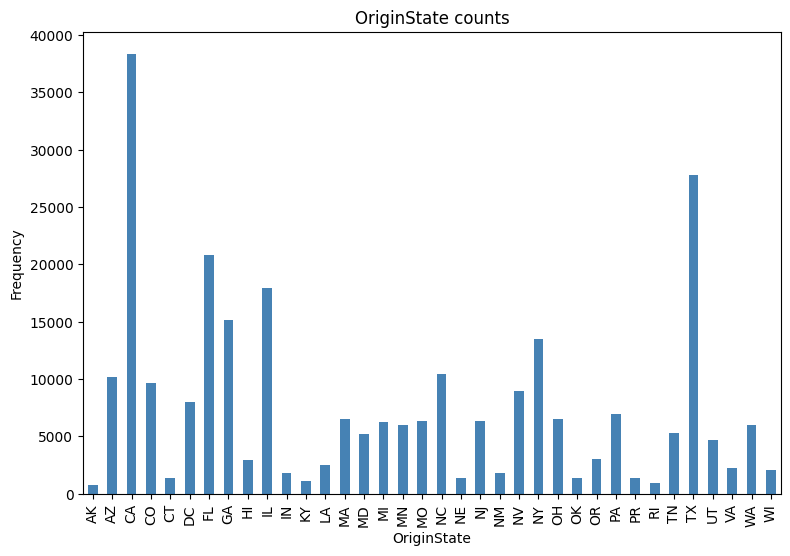

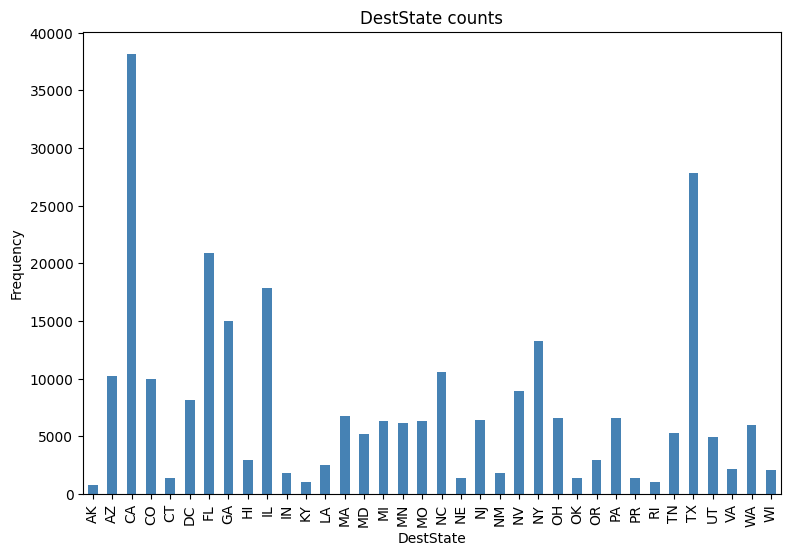

In [16]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features1 = ['Carrier','DayOfWeek']
categorical_features2 = ['OriginState','DestState']

for col in categorical_features1+categorical_features2:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()


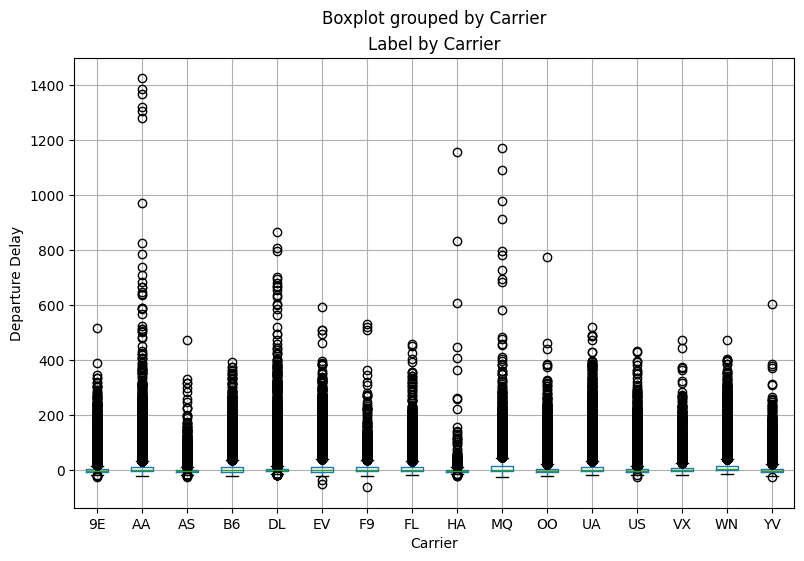

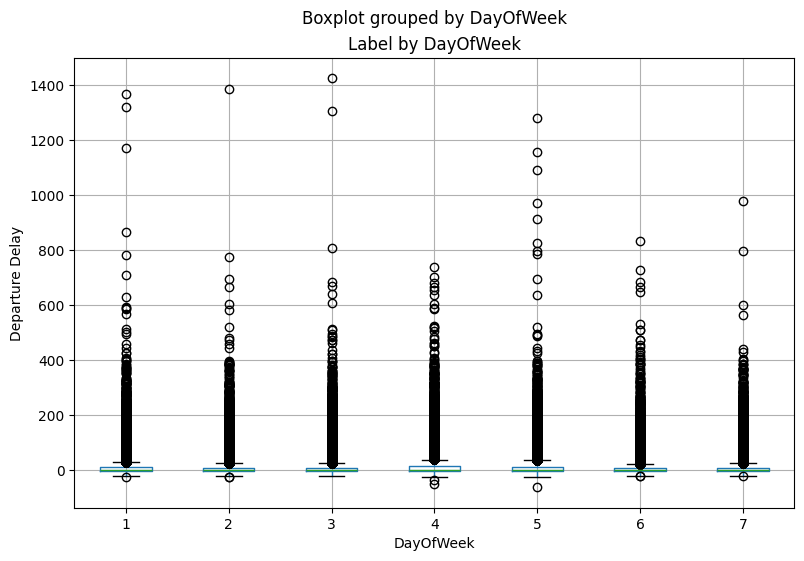

In [17]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features1:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'DepDelay', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Departure Delay")
plt.show()


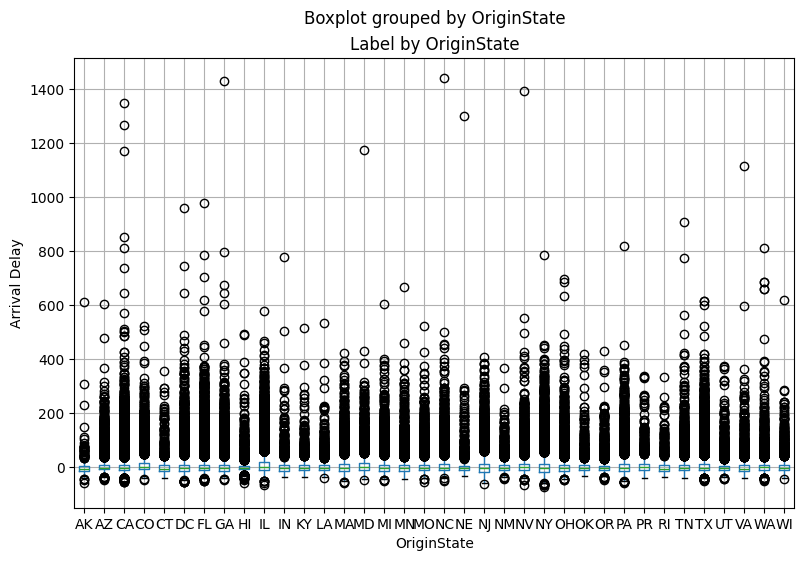

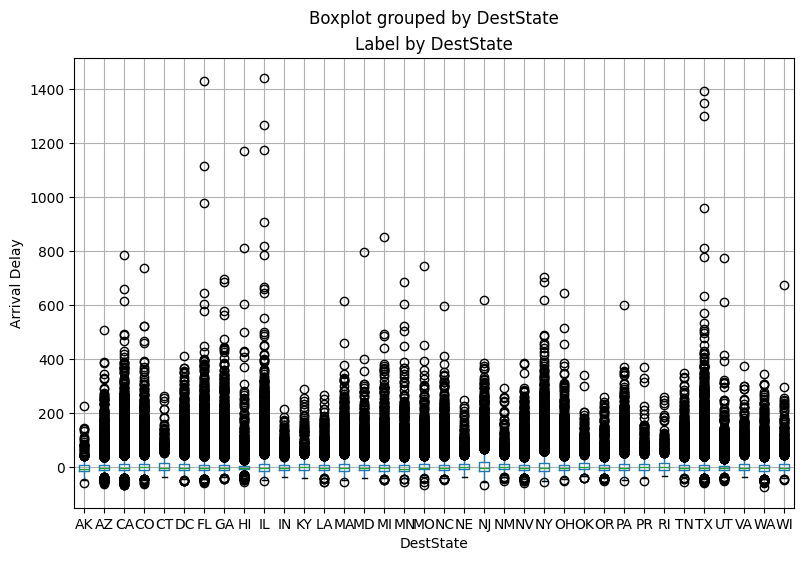

In [18]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features2:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'ArrDelay', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Arrival Delay")
plt.show()


### Regression

y = DepDelay

X = [Carrier, CRSDepTime, OriginState, DestState]


In [27]:
model_X = bike_data[['Carrier','CRSDepTime','OriginState','DestState']]
model_y = bike_data[['DepDelay']]


In [28]:
model_X = pd.get_dummies(data=model_X, drop_first=True)


In [29]:
# Separate features and labels
# X, y = bike_data[['Carrier','CRSDepTime','OriginState','DestState']].values, bike_data['DepDelay'].values
X = model_X.values
y = model_y.values

print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')


Features:
[[1539 False False False True False False False False False False False
  False False False False False False False False False True False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False True False False False False False False False False False False
  False False]
 [710 False False False False False False False False False False False
  False False True False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False True False False False False False
  False False False False False False False False False False False True
  False False False False False False False False False False False False
  False False False Fa

In [30]:
from sklearn.model_selection import train_test_split

# Split data 80%-20% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print ('Training Set: %d data\nTest Set: %d data' % (X_train.shape[0], X_test.shape[0]))


Training Set: 217552 data
Test Set: 54388 data


In [31]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set

model = LinearRegression().fit(X_train, y_train)

model = LinearRegression().fit(X_train, y_train)
print (model)


LinearRegression()


In [32]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])


Predicted labels:  [[-3.]
 [ 9.]
 [13.]
 [ 5.]
 [10.]
 [-0.]
 [ 4.]
 [13.]
 [15.]
 [25.]]
Actual labels   :  [[ 88]
 [ -5]
 [ 11]
 [ -6]
 [  2]
 [ -4]
 [ -1]
 [  3]
 [ -6]
 [358]]


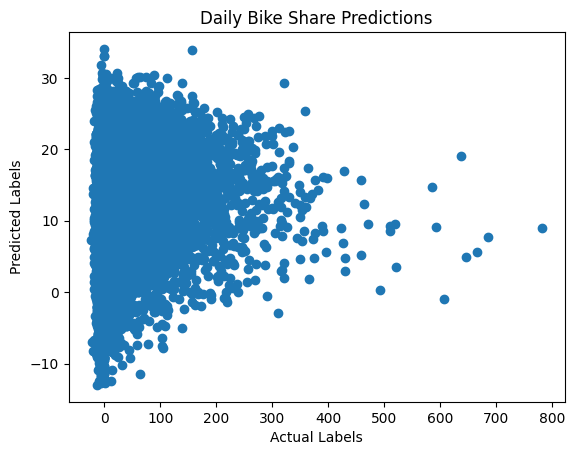

In [35]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
# z = np.polyfit(y_test, predictions, 1)
# p = np.poly1d(z)
# plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)


MSE: 1184.6280302732898
RMSE: 34.41842573787026
R2: 0.04032307489746134


### END
